<img src="tic3151.png" style="height: 70px; width: 200px" align=left> 
<img src="logo-MMU.png" style="height: 70px; width: 200px" align=right> 

## Assignment 

### Team members

Ahmad Ayaan - 1191302794 

Salah Fayeq y. AlHaismawi - 1201303035

Aisha Sakinah Binti Saadon - 1191101867

Aryssa Amanda Binti Azhar - 1191100575


### The assignment contains following questions

- A* search using Manhattan distance
- Breadth-First Search where a cell is allowed to be visited at most thrice.

#### The task is to Plot visual(s) to compare between the time that the agent needs to reach the goal using A* and breadth-first search for 5 different sizes of maze.


# Import library

In [1]:
from pyamaze import maze,agent,COLOR,textLabel
from queue import PriorityQueue
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import timeit

# Create maze with 5 different size

In [2]:
# # Sizes of the mazes
# maze_sizes = [(10, 10), (15, 15), (20, 20), (25, 25), (30, 30)]

# for size in maze_sizes:
#     width, height = size

#     x, y = 1, 1  # goal position
#     m = maze(width, height)

#     m.CreateMaze(x,y, saveMaze=True)
#     m.run()

# a. A* search using Manhattan distance

In [3]:
# Declaring the heuristic function as manhattan distance

def h(cell1,cell2):
    x1,y1=cell1
    x2,y2=cell2
    return abs(x1-x2) + abs(y1-y2)

In [4]:
def aStar(m):
    start=(m.rows,m.cols)
    g_score={cell:float('inf') for cell in m.grid}
    g_score[start]=0
    f_score={cell:float('inf') for cell in m.grid}
    f_score[start]=h(start,(1,1))

    open=PriorityQueue()
    open.put((h(start,(1,1)),h(start,(1,1)),start))
    aPath={}
    searchPath=[]

    while not open.empty():
        currCell=open.get()[2]
        searchPath.append(currCell)
      
        # if current cell == goal then end
        if currCell ==(1,1):
            break
            
        for d in "ESNW":
            if m.maze_map[currCell][d]==True:
                if d=="E":
                    childCell=(currCell[0], currCell[1]+1)
                if d=="W":
                    childCell=(currCell[0], currCell[1]-1)
                if d=="S":
                    childCell=(currCell[0]+1, currCell[1])
                if d=="N":
                    childCell=(currCell[0]-1, currCell[1])
                    
                temp_g_score = g_score[currCell] + 1
                temp_f_score = temp_g_score + h(childCell, (1,1))

                if temp_f_score < f_score[childCell]:
                    g_score[childCell] = temp_g_score
                    f_score[childCell] = temp_f_score
                    open.put((temp_f_score, h(childCell,(1,1)), childCell))
                    aPath[childCell] = currCell
                
    fwdPath={}
    cell=(1,1)
    
    while cell!=start:
        fwdPath[aPath[cell]]=cell
        cell=aPath[cell]
        
    return fwdPath,aPath, searchPath

### Visualize the aStar path

In [5]:
maze_files = ['maze--2023-05-17--10-14-16.csv', 'maze--2023-05-17--10-14-18.csv', 
             'maze--2023-05-17--10-14-20.csv', 'maze--2023-05-17--10-14-21.csv', 
             'maze--2023-05-17--10-14-23.csv']

# Define the maze sizes
maze_sizes = [(10, 10), (15, 15), (20, 20), (25, 25), (30, 30)]

# Create empty lists to store the search times and maze names
search_times = []
maze_names = []
maze_sizes_list = []
path_lengths = []

for maze_file, maze_size in zip(maze_files, maze_sizes):
    # Create the maze and load maze from a file
    m = maze()
    m.CreateMaze(loadMaze= maze_file)

    # Measure the execution time using timeit
    execution_time = timeit.timeit(lambda: aStar(m), number=1)
    execution_time = round(execution_time, 6)
    
    # Add the search time and maze name to the lists
    maze_names.append(maze_file)
    maze_sizes_list.append(maze_size)
    search_times.append(execution_time)
    
    # Create agents for demo purposes
    a = agent(m, footprints=True)
    b = agent(m, footprints=True, color=COLOR.yellow, filled=True)

    # Trace and print the search path
    path = aStar(m)
    m.tracePath({b: path[2]}, showMarked=True)

    # Trace and print the forward path
    m.tracePath({a: path[0]})
    l = textLabel(m, "A star Path Length", len(path[0]) + 1)
    
    # Add the path length to the list
    path_lengths.append(len(path[0]))

# Create a DataFrame from the search times and maze names
df_AStar = pd.DataFrame({'Maze': maze_names, 'Maze Size': maze_sizes_list, 'Search Time': search_times, 'Path Length': path_lengths})
df_AStar

,Maze,Maze Size,Search Time,Path Length
0,maze--2023-05-17--10-14-16.csv,"(10, 10)",0.001009,58
1,maze--2023-05-17--10-14-18.csv,"(15, 15)",0.001644,104
2,maze--2023-05-17--10-14-20.csv,"(20, 20)",0.003697,266
3,maze--2023-05-17--10-14-21.csv,"(25, 25)",0.003349,164
4,maze--2023-05-17--10-14-23.csv,"(30, 30)",0.007217,270


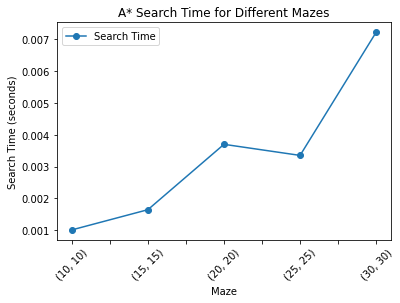

In [6]:
# Plot the graph
df_AStar.plot(x='Maze Size', y='Search Time', kind='line', marker='o')

# Set the labels and title
plt.xlabel('Maze')
plt.ylabel('Search Time (seconds)')
plt.title('A* Search Time for Different Mazes')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# b. Breadth-First Search where a cell is allowed to be visited at most thrice.

In [7]:
def BFS(m):
    #initialization    
    start=(m.rows,m.cols)
    explored=[start]
    frontier=[start]
    
    # Dictionary to keep track of visited cells and their visit count
    visitedCount = {start: 1} 

    bfsPath={}
    searchPath=[]
    
    # continue loop as long as frontier !=0
    while len(frontier)>0:
        currCell = frontier.pop(0)
        searchPath.append(currCell)
       
        
        # if current cell == goal then end
        if currCell ==(1,1):
            break
        
        # this loop is to look into all 4 directions.
        for d in "ESNW":
            if m.maze_map[currCell][d]==True:
                if d=="E":
                    childCell=(currCell[0], currCell[1]+1)
                elif d=="W":
                    childCell=(currCell[0], currCell[1]-1)
                elif d=="S":
                    childCell=(currCell[0]+1, currCell[1])
                elif d=="N":
                    childCell=(currCell[0]-1, currCell[1])
                

                
                if childCell not in visitedCount:
                    visitedCount[childCell] = 1
                else:
                    visitedCount[childCell] += 1

                if childCell in explored and visitedCount[childCell] >= 3:
                    continue
                    
                explored.append(childCell)
                frontier.append(childCell)
                bfsPath[childCell]=currCell

                if(childCell ==(1,1)):
                    break

    fwdPath={}
    cell=(1,1)
    
    
    while cell != start:  
        fwdPath[bfsPath[cell]] = cell  
        cell = bfsPath[cell] 
    
    return fwdPath, bfsPath, searchPath

In [8]:
maze_files = ['maze--2023-05-17--10-14-16.csv', 'maze--2023-05-17--10-14-18.csv', 
             'maze--2023-05-17--10-14-20.csv', 'maze--2023-05-17--10-14-21.csv', 
             'maze--2023-05-17--10-14-23.csv']

# Define the maze sizes
maze_sizes = [(10, 10), (15, 15), (20, 20), (25, 25), (30, 30)]

# Create empty lists to store the search times and maze names
search_times = []
maze_names = []
maze_sizes_list = []
path_lengths = []

for maze_file, maze_size in zip(maze_files, maze_sizes):
    # Create the maze and load maze from a file
    m = maze()
    m.CreateMaze(loadMaze= maze_file)

  # Measure the execution time using timeit
    execution_time = timeit.timeit(lambda: BFS(m), number=1)
    execution_time = round(execution_time, 6)
    
    # Add the search time and maze name to the lists
    maze_names.append(maze_file)
    maze_sizes_list.append(maze_size)
    search_times.append(execution_time)
    
    # Create agents for demo purposes
    a = agent(m, footprints=True)
    b=agent(m,footprints=True,color=COLOR.yellow,filled=True)
    
    # Trace and print the search path
    path = BFS(m)
    m.tracePath({b:path[2]},showMarked=True)
    
    m.tracePath({a: path[0]})
    l = textLabel(m, "BFS Path Length", len(path[0]) + 1)
    
    # Add the path length to the list
    path_lengths.append(len(path[0]))

# Create a DataFrame from the search times and maze names
df_BFS = pd.DataFrame({'Maze': maze_names, 'Maze Size': maze_sizes_list, 'Search Time': search_times, 'Path Length': path_lengths})
df_BFS

,Maze,Maze Size,Search Time,Path Length
0,maze--2023-05-17--10-14-16.csv,"(10, 10)",0.001534,58
1,maze--2023-05-17--10-14-18.csv,"(15, 15)",0.005819,104
2,maze--2023-05-17--10-14-20.csv,"(20, 20)",0.017561,266
3,maze--2023-05-17--10-14-21.csv,"(25, 25)",0.033229,164
4,maze--2023-05-17--10-14-23.csv,"(30, 30)",0.091769,270


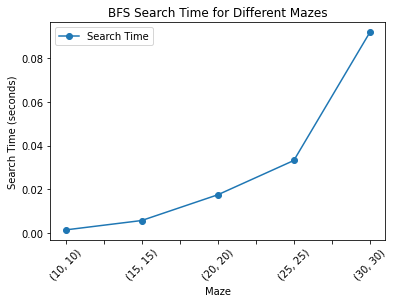

In [9]:
# Plot the graph
df_BFS.plot(x='Maze Size', y='Search Time', kind='line', marker='o')

# Set the labels and title
plt.xlabel('Maze')
plt.ylabel('Search Time (seconds)')
plt.title('BFS Search Time for Different Mazes')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Comparison of A* and BFS

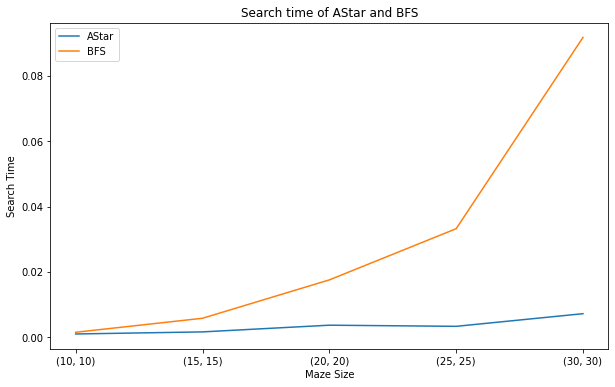

In [10]:
maze_size = ['(10, 10)', '(15, 15)', '(20, 20)', '(25, 25)', '(30, 30)']

search_time1 = df_AStar['Search Time'].values
search_time2 = df_BFS['Search Time'].values

plt.figure(figsize=(10, 6))
plt.plot(maze_size, search_time1, label="AStar")
plt.plot(maze_size, search_time2, label="BFS")
plt.xlabel('Maze Size')
plt.ylabel('Search Time')
plt.title('Search time of AStar and BFS')
plt.legend()
plt.show()

# Summary


>Based on the findings, A* algorithm generally outperforms BFS in terms of search time, taking between 0.001009s to 0.007217s, while BFS ranges from 0.001534s to 0.091769s. However, both BFS and A* algorithms yield similar path lengths for each maze, indicating their effectiveness in finding the shortest path from start to goal. In summary, the performance of both algorithms remains consistent across different maze sizes, with A* algorithm demonstrating slightly faster search times. These algorithms offer reliable solutions for maze navigation, with BFS ensuring the shortest path and A* striking a balance between optimality and efficiency.